## Group 8: The Relationship between Economic and Health Status
By Claire Stiles, Sowmya Subramaniam, and Erin Choi

## Project and Dataset Overview:
This project will focus on the relationship between health status and economic status in the United States. The data comes from the Kaiser Family Foundation's State Health Facts page. The FederalPovertyLevel csv file contains data on the distribution of the total population by federal poverty level in each state and in the overall country. The HealthStatus csv file breaks down adults who report fair or poor health status by race/ethnicity and all adults.

Variable breakdown for FederalPovertyLevel file:
- **Location**: The geographic area (e.g., United States, Alabama, Alaska).
- **Under 100%**: The proportion of the population living under 100% of the federal poverty level.
- **100-199%**: The proportion of the population living between 100% and 199% of the federal poverty level.
- **200-399%**: The proportion of the population living between 200% and 399% of the federal poverty level.
- **400%+**: The proportion of the population living above 400% of the federal poverty level.
- **Total**: Should always be 1, representing 100% of the population distributed across the categories.

Variable breakdown for HealthStatus file:
- **Location**: The geographic area (e.g., United States, Alabama, Alaska).
- **All Adults**: The proportion of all adults reporting fair or poor health status.
- **White**: The proportion of White adults reporting fair or poor health status.
- **Black**: The proportion of Black adults reporting fair or poor health status.
- **Hispanic**: The proportion of Hispanic adults reporting fair or poor health status.
- **Asian/ Native Hawaiian or Pacific Islander**: The proportion of Asian, Native Hawaiian, or Pacific Islander adults reporting fair or poor health status.
- **American Indian/ Alaska Native**: The proportion of American Indian or Alaska Native adults reporting fair or poor health status.
- **Other**: The proportion of adults from other races/ethnicities reporting fair or poor health status.

In [1]:
# import statements
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [2]:
# read in both csv files, indicating how NA values are represented and using indexing to exclude territories
fpl = pd.read_csv('FederalPovertyLevel.csv', header = 2, na_values=["NSD"])
fpl = fpl[:52]
fpl = fpl.set_index('Location')
hs = pd.read_csv('HealthStatus.csv', header = 2, na_values=["NSD"])
hs = hs[:52]
hs = hs.set_index('Location')

In [3]:
# clean out datasets, keeping only the columns needed for analysis
fpl = fpl[['Under 100%', '100-199%', '200-399%', '400%+']]
hs = hs[['All Adults', 'White',	'Black','Hispanic',	'Asian/ Native Hawaiian or Pacific Islander','American Indian/ Alaska Native',	'Other']]

In [4]:
# Merge the two datasets
merged = pd.concat([fpl, hs], axis = 1)
merged.head()

,Under 100%,100-199%,200-399%,400%+,All Adults,White,Black,Hispanic,Asian/ Native Hawaiian or Pacific Islander,American Indian/ Alaska Native,Other
Location,,,,,,,,,,,
United States,0.126,0.158,0.296,0.420,0.177,0.160,0.223,0.236,0.097,0.287,0.220
Alabama,0.165,0.187,0.312,0.336,0.240,0.219,0.285,0.242,NaN,0.352,0.400
Alaska,0.114,0.136,0.282,0.467,0.165,0.148,0.271,0.174,0.142,0.214,0.206
Arizona,0.126,0.170,0.319,0.386,0.190,0.170,0.175,0.249,0.125,0.287,0.249
Arkansas,0.168,0.208,0.326,0.298,0.247,0.233,0.350,0.240,NaN,0.316,0.307


In [5]:
# Calculate and report the correlation coefficent between 'Under 100%' and 'All Adults'

under100r = np.corrcoef(merged['Under 100%'], merged['All Adults'])
r100 = under100r[0][1]

print('The correlation coefficent between the percent of people under 100% of the federal poverty line and the percent of people who report fair or poor health is {0:.3f}.'
      .format(r100))

The correlation coefficent between the percent of people under 100% of the federal poverty line and the percent of people who report fair or poor health is 0.812.


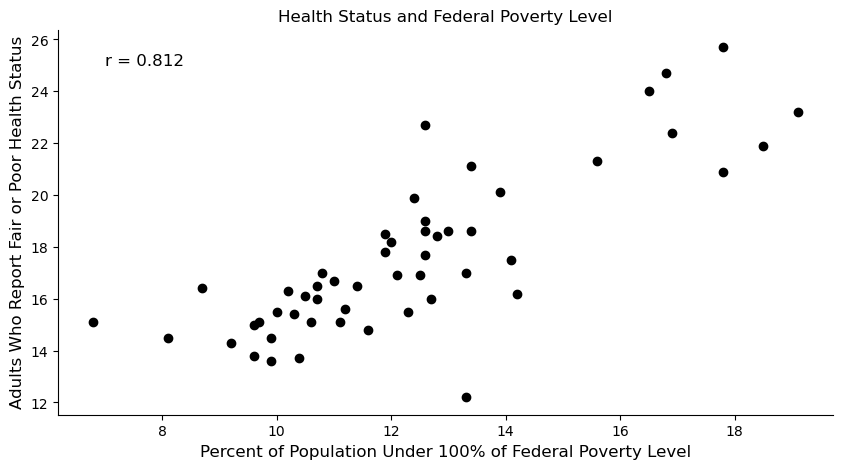

In [6]:
# plot health status vs. percent of population under 100% of federal poverty level
fig, ax = plt.subplots(figsize=(10,5)) 

ax.scatter(merged['Under 100%']*100, merged['All Adults']*100,        
        color='black'                   
       ) 

plt.text(7, 25, 'r = 0.812', fontsize = 12)     

ax.set_ylabel('Adults Who Report Fair or Poor Health Status', fontsize = 12)
ax.set_xlabel('Percent of Population Under 100% of Federal Poverty Level', fontsize = 12)
ax.set_title('Health Status and Federal Poverty Level', fontsize = 12)
sns.despine(ax=ax)

plt.savefig('under100.svg', format='svg', bbox_inches='tight')        # Save figure as svg

plt.show()

In [7]:
# Calculate and report the correlation coefficent between '400%+' and 'All Adults'

over400r = np.corrcoef(merged['400%+'], merged['All Adults'])
r400 = over400r[0][1]

print('The correlation coefficent between the percent of people over 400% of the federal poverty line and the percent of people who report fair or poor health is {0:.3f}.'
      .format(r400))

The correlation coefficent between the percent of people over 400% of the federal poverty line and the percent of people who report fair or poor health is -0.790.


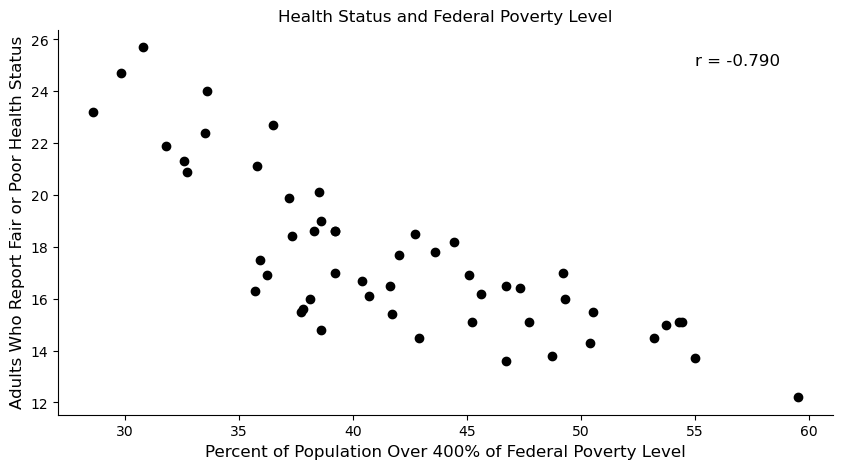

In [8]:
# plot health status vs. percent of population over 400% of federal poverty level
fig, ax = plt.subplots(figsize=(10,5)) 

ax.scatter(merged['400%+']*100, merged['All Adults']*100,        
        color='black'                   
       )  

plt.text(55, 25, 'r = -0.790', fontsize = 12)

ax.set_ylabel('Adults Who Report Fair or Poor Health Status', fontsize = 12)
ax.set_xlabel('Percent of Population Over 400% of Federal Poverty Level', fontsize = 12)
ax.set_title('Health Status and Federal Poverty Level', fontsize = 12)
sns.despine(ax=ax)

plt.savefig('over400.svg', format='svg', bbox_inches='tight')        # Save figure as svg

plt.show()

In [9]:
# Calculate and report the correlation coefficent between '200-399%' and 'All Adults'

between200r = np.corrcoef(merged['200-399%'], merged['All Adults'])
r200 = between200r[0][1]

print('The correlation coefficent between the percent of people under 100% of the federal poverty line and the percent of people who report fair or poor health is {0:.3f}.'
      .format(r200))

The correlation coefficent between the percent of people under 100% of the federal poverty line and the percent of people who report fair or poor health is 0.402.


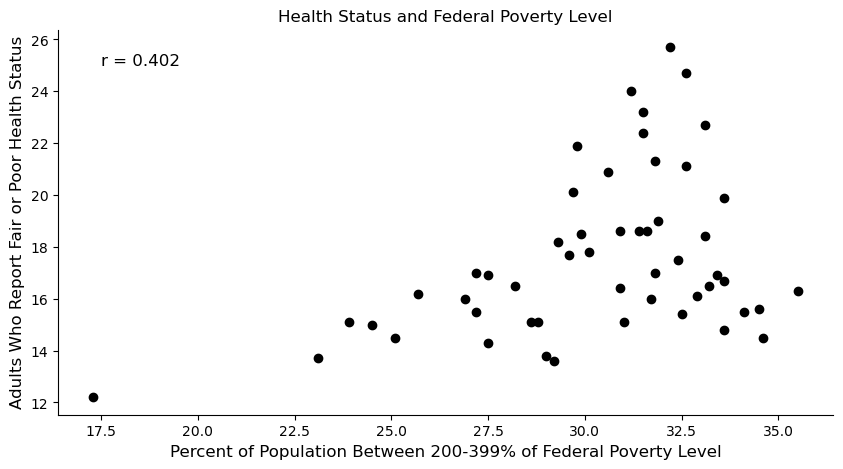

In [10]:
# plot health status vs. percent of population between 200-399% of federal poverty level
fig, ax = plt.subplots(figsize=(10,5)) 

ax.scatter(merged['200-399%']*100, merged['All Adults']*100,        
        color='black'                   
       )  

plt.text(17.5, 25, 'r = 0.402', fontsize = 12)

ax.set_ylabel('Adults Who Report Fair or Poor Health Status', fontsize = 12)
ax.set_xlabel('Percent of Population Between 200-399% of Federal Poverty Level', fontsize = 12)
ax.set_title('Health Status and Federal Poverty Level', fontsize = 12)
sns.despine(ax=ax)

plt.savefig('between200.svg', format='svg', bbox_inches='tight')        # Save figure as svg

plt.show()

In [11]:
# Create dictionary of United States regions
South = ['West Virginia', 'District of Columbia', 'Maryland', 'Virginia','Kentucky', 'Tennessee', 'North Carolina', 'Mississippi','Arkansas', 'Louisiana', 'Alabama', 'Georgia', 'South Carolina','Florida', 'Delaware']
Southwest = ['Arizona', 'New Mexico', 'Oklahoma', 'Texas']
West = ['Washington', 'Oregon', 'California', 'Nevada', 'Idaho', 'Montana', 'Wyoming', 'Utah', 'Colorado', 'Alaska', 'Hawaii']
Midwest = ['North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota','Iowa', 'Missouri', 'Wisconsin', 'Illinois', 'Michigan', 'Indiana','Ohio']
Northeast = ['Maine', 'Vermont', 'New York', 'New Hampshire', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New Jersey', 'Pennsylvania']

regions = {'South': South, 'Southwest': Southwest, 'West': West, 'Midwest': Midwest, 'Northeast': Northeast, 'United States': 'United States'}

In [12]:
# Create a "Region" column, and assign values to every column based on the regions dictionary
merged["Region"] = ""
for i in merged.index:
    for item in regions:
        if i in regions[item]:
            merged.loc[i, "Region"] = item
        else:
            continue

merged.head()

,Under 100%,100-199%,200-399%,400%+,All Adults,White,Black,Hispanic,Asian/ Native Hawaiian or Pacific Islander,American Indian/ Alaska Native,Other,Region
Location,,,,,,,,,,,,
United States,0.126,0.158,0.296,0.420,0.177,0.160,0.223,0.236,0.097,0.287,0.220,United States
Alabama,0.165,0.187,0.312,0.336,0.240,0.219,0.285,0.242,NaN,0.352,0.400,South
Alaska,0.114,0.136,0.282,0.467,0.165,0.148,0.271,0.174,0.142,0.214,0.206,West
Arizona,0.126,0.170,0.319,0.386,0.190,0.170,0.175,0.249,0.125,0.287,0.249,Southwest
Arkansas,0.168,0.208,0.326,0.298,0.247,0.233,0.350,0.240,NaN,0.316,0.307,South


In [13]:
# Group state data into regions

groups = merged.groupby("Region")[['All Adults', 'White','Black','Hispanic','Asian/ Native Hawaiian or Pacific Islander','American Indian/ Alaska Native','Other']].mean()
groups = groups.reset_index()

In [14]:
# Sort values in ascending order by average of all adults, change values into percentages 

groups = groups.sort_values(['All Adults'])
groups[['All Adults', 'White','Black','Hispanic','Asian/ Native Hawaiian or Pacific Islander','American Indian/ Alaska Native','Other']] = groups[['All Adults', 'White','Black','Hispanic','Asian/ Native Hawaiian or Pacific Islander','American Indian/ Alaska Native','Other']].multiply(100)
groups.head()

,Region,All Adults,White,Black,Hispanic,Asian/ Native Hawaiian or Pacific Islander,American Indian/ Alaska Native,Other
1,Northeast,15.377778,13.888889,18.514286,22.800000,8.483333,35.914286,21.400000
5,West,16.545455,14.827273,22.566667,21.718182,12.437500,27.210000,19.800000
0,Midwest,16.783333,15.650000,22.936364,20.466667,9.500000,26.900000,24.522222
4,United States,17.700000,16.000000,22.300000,23.600000,9.700000,28.700000,22.000000
2,South,19.553333,17.986667,23.506667,19.106667,9.033333,31.580000,25.884615


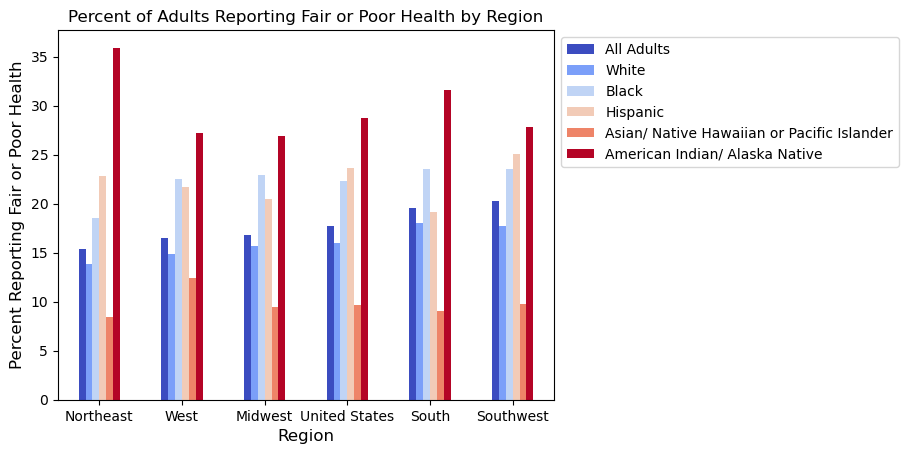

In [15]:
# Create bar graph grouped by region, with bars for each race

groups.plot(x="Region", 
            y=['All Adults', 'White','Black','Hispanic','Asian/ Native Hawaiian or Pacific Islander','American Indian/ Alaska Native'], 
            kind="bar",
            title = "Percent of Adults Reporting Fair or Poor Health by Region",
            colormap = 'coolwarm')
plt.legend(bbox_to_anchor=(1, 1))        # Move Legend to the side
plt.tick_params(axis='x', labelrotation=0)        # Rotate ticks
plt.xlabel('Region', fontsize=12)        # Make x label larger
plt.ylabel('Percent Reporting Fair or Poor Health', fontsize=12)      # Make y label larger

plt.savefig('barchart.svg', format='svg', bbox_inches='tight')        # Save figure as svg